# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.ensemble  import RandomForestRegressor as rfg
import xgboost as xgb
import pickle

# Reading data

In [2]:
data = pd.read_csv("garments_worker_productivity.csv")
data.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Correlation Analysis

In [3]:
import seaborn as sns

num = data.select_dtypes(include=[float, int])

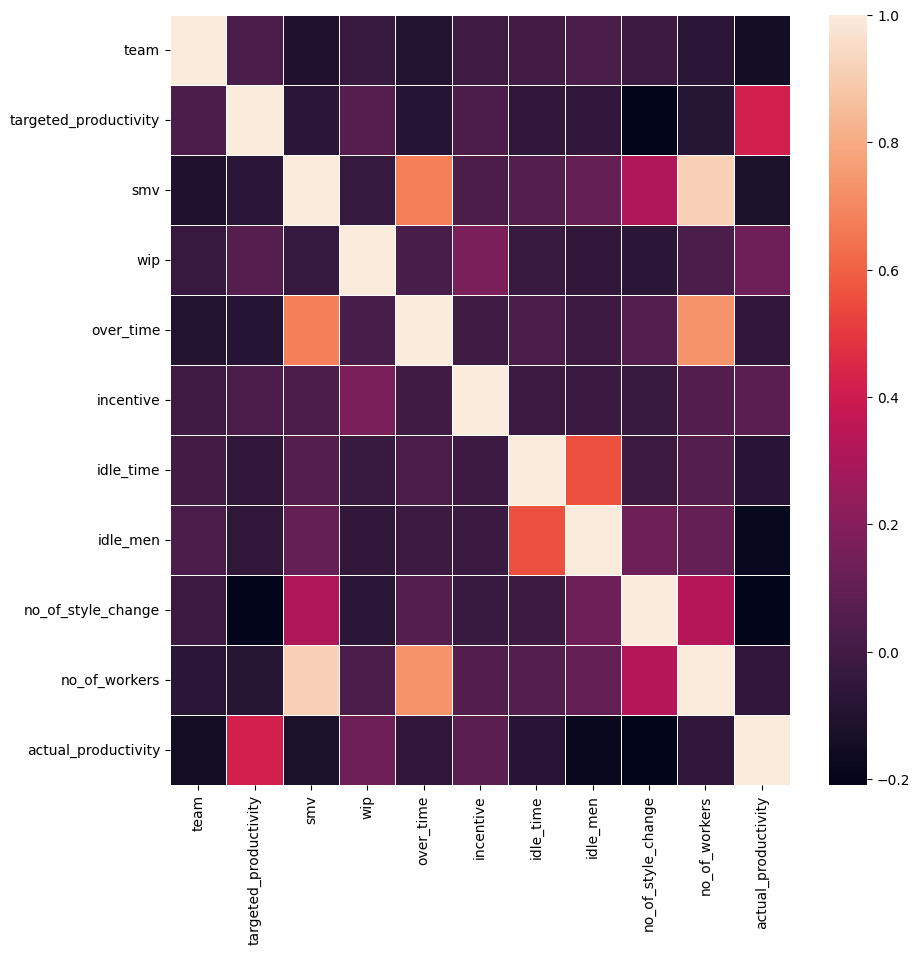

In [4]:
corrMat = num.corr()

fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(corrMat, annot=False, linewidths=0.5, ax=ax)
plt.show()

# Descriptive Analysis

In [5]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


# Data Preprocessing

## Checking Null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
data.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [8]:
data.shape

(1197, 15)

In [9]:
data.drop(['wip'], axis = 1, inplace = True)
data.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

## Handling Date & department column

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data.date

0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [12]:
data['month'] = data['date'].dt.month
print(data['month'])

0       1
1       1
2       1
3       1
4       1
       ..
1192    3
1193    3
1194    3
1195    3
1196    3
Name: month, Length: 1197, dtype: int32


In [13]:
data.drop(['date'], axis = 1, inplace = True)

In [14]:
data['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [15]:
data['department'] = data['department'].apply(lambda x: 'finishing' if x.replace(" ",'') == 'finishing' else 'sweing')

In [16]:
data['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

## Handling Categorical Values

In [17]:
mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data = mcle.fit_transform(data)

## Splitting data into train and test

In [18]:
x = data.drop(['actual_productivity'], axis =1)
y = data['actual_productivity']

In [19]:
X = x.to_numpy()
X

array([[ 0. ,  0. ,  0. , ...,  0. , 59. ,  1. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  8. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. , 30.5,  1. ],
       ...,
       [ 1. ,  1. ,  5. , ...,  0. ,  8. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. , 15. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. ,  6. ,  3. ]], shape=(1197, 13))

In [20]:
x_train, x_test, y_train, y_test = tts(X, y, test_size = 0.25, random_state=11)

## Making Models

Linear Regression

In [21]:
model_lr = lr()
model_lr.fit(X, y)

LinearRegression()

Random Forest Regressor

In [22]:
model_rf = rfg(n_estimators=200, max_depth=5)
model_rf.fit(X, y)

RandomForestRegressor(max_depth=5, n_estimators=200)

XGB Regressor

In [23]:
model_xg = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
model_xg.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

## Comparing models

In [24]:
pred_lr = model_lr.predict(x_test)
print("Linear Regression:")
print("test_MSE:",mse(y_test,pred_lr))
print("test_MAE:",mae(y_test,pred_lr))
print("R2_Score:{}".format(r2(y_test,pred_lr)))

Linear Regression:
test_MSE: 0.020720573600591125
test_MAE: 0.1072215072838066
R2_Score:0.27176154954969567


In [25]:
pred_rf = model_rf.predict(x_test)
print("Random Forest Regressor:")
print("test_MSE:",mse(y_test,pred_rf))
print("test_MAE:",mae(y_test,pred_rf))
print("R2_Score:{}".format(r2(y_test,pred_rf)))

Random Forest Regressor:
test_MSE: 0.012239166173020946
test_MAE: 0.07654600943305476
R2_Score:0.5698462996029086


In [26]:
pred3=model_xg.predict(x_test)
print("XGB Regressor:")
print("test_MSE:", mse(y_test, pred3))
print("test_MAE:", mae(y_test, pred3))
print("R2_Score:{}".format(r2(y_test, pred3)))

XGB Regressor:
test_MSE: 0.004161173740158984
test_MAE: 0.03774973963523951
R2_Score:0.8537527592140873


## Saving the best model

In [27]:
# Saving XGB model as it has the best score
pickle.dump(model_xg, open('model.pkl', 'wb'))